In [1]:
import pandas as pd
import openpyxl

# Path to the Excel file
excel_file_path = 'user-self-reports/target-enjoyment.xlsx'

# Import the target-enjoyment tab
target_enjoyment_df = pd.read_excel(excel_file_path, sheet_name='target-enjoyment', header=1)

# Create empty lists to store data
data = []

# Iterate through each PID in the target_enjoyment_df
for idx, row in target_enjoyment_df.iterrows():
    pid = row['PID']

    if pid == 26:
        continue  # Skip PID 26
    
    # Get robot names for Q1 and Q2
    robot_q1 = row['Q1-Robot']
    robot_q2 = row['Q2-Robot']
    
    # For Q1 (first robot)
    for q_num in range(1, 8):
        q_col = f'Q{q_num}-1'
        if q_col in row:
            data.append({
                'user_id': int(pid),
                'question': f"Q{q_num}",
                'robot': robot_q1,
                'answer': row[q_col]
            })
    
    """# For Q2 (second robot)
    for q_num in range(1, 9):
        q_col = f'Q{q_num}-2'
        if q_col in row:
            data.append({
                'user_id': int(pid),
                'question': f"Q{q_num}",
                'robot': robot_q2,
                'answer': row[q_col]
            })"""

# Create the new DataFrame
ordered_df = pd.DataFrame(data)

# Pivot the DataFrame to make questions as columns
ordered_df = ordered_df.pivot(index=['user_id', 'robot'], columns='question', values='answer').reset_index()

# Sort by robot and then by user_id
ordered_df = ordered_df.sort_values(by=['user_id']).reset_index(drop=True)

# Correctly update Q7 and Q8 in the original DataFrame
ordered_df['Q7'] = 8 - ordered_df['Q7']
# ordered_df['Q8'] = 8 - ordered_df['Q8']

ordered_df["Average"] = ordered_df.iloc[:, 2:].mean(axis=1)

# Print the DataFrame without the index
print(ordered_df.to_string(index=False))

target_df = ordered_df[["user_id", "Average"]].copy()

# Save target_df to a new csv file
target_df.to_csv('y-enjoyment.csv', index=False)

 user_id robot  Q1  Q2  Q3  Q4  Q5  Q6  Q7  Average
       4 Alice   3   5   2   2   5   5   6 4.000000
       5 Clara   6   6   6   6   7   6   7 6.285714
       6 Clara   6   7   7   6   7   6   7 6.571429
       7 Clara   7   7   7   7   7   7   7 7.000000
       8 Alice   7   6   6   6   6   7   7 6.428571
       9 Clara   6   4   5   5   6   4   5 5.000000
      10 Clara   2   6   3   5   5   6   6 4.714286
      11 Clara   7   7   7   7   6   5   7 6.571429
      12 Alice   2   2   4   3   4   6   4 3.571429
      13 Alice   6   5   5   5   5   6   5 5.285714
      14 Clara   4   4   2   2   5   2   2 3.000000
      15 Alice   3   4   2   2   3   4   3 3.000000
      16 Alice   5   5   5   5   6   6   5 5.285714
      17 Alice   7   7   6   7   7   7   7 6.857143
      18 Alice   1   5   1   1   1   1   2 1.714286
      19 Alice   6   6   6   6   6   6   6 6.000000
      20 Clara   5   6   6   6   4   4   7 5.428571
      21 Alice   7   7   7   7   6   6   7 6.714286
      22 Ali

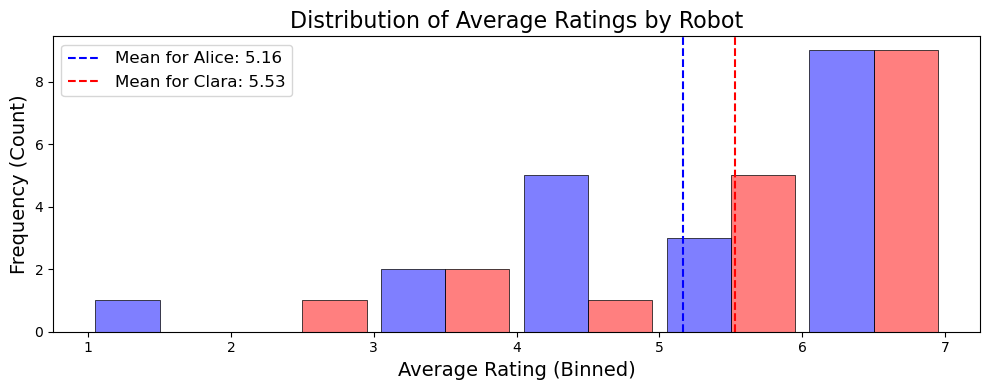

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np # Import numpy for floor/ceil if using dynamic range
import pandas as pd # Assuming ordered_df is a pandas DataFrame


# 1. Determine the range for bins dynamically (Recommended)
min_val = 1
max_val = 7
# Create bin edges with step 1 (e.g., [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0])
bin_edges = np.arange(min_val, max_val + 1, 1)

# OR 2. Define fixed bin edges (if you know the exact scale, e.g., 0-5)
# bin_edges = [0, 1, 2, 3, 4, 5, 6] # Example for ratings up to 5

# Create a figure with bigger size
plt.figure(figsize=(10, 4)) # Might need slightly wider figure for dodged bars

# Create a distribution plot with discrete, side-by-side bars
# - Added multiple='dodge'
# - Adjusted alpha slightly, might not need as much transparency now
ax = sns.histplot(data=ordered_df, x='Average', hue='robot',
                  bins=bin_edges,         # Use explicit bin edges
                  multiple='dodge',       # <-- KEY CHANGE: Position bars side-by-side
                  kde=False,              # Turn off KDE for discrete look
                  palette=['blue', 'red'],
                  alpha=0.5,              # Can use slightly higher alpha now
                  edgecolor='black',      # Add edge color for clarity
                  linewidth=0.5,
                  shrink=0.9)             # Optional: shrink bars slightly for spacing

# Add a vertical line for the mean of each robot
# Note: These lines still represent the overall mean for each robot across all bins
for robot, color in zip(['Alice', 'Clara'], ['blue', 'red']):
    mean_val = ordered_df[ordered_df['robot'] == robot]['Average'].mean()
    plt.axvline(x=mean_val, color=color, linestyle='--',
                label=f'Mean for {robot}: {mean_val:.2f}')

# Set x-axis ticks to align with bin edges (optional, for clarity)
# Ticks still represent the start/end of the bin intervals
plt.xticks(bin_edges)

# Add titles and labels
plt.title('Distribution of Average Ratings by Robot', fontsize=16)
plt.xlabel('Average Rating (Binned)', fontsize=14)
plt.ylabel('Frequency (Count)', fontsize=14)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()